<a href="https://colab.research.google.com/github/anny-0212/AI/blob/master/0604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [14]:
!pwd

import os
os.chdir("");
//交換資料夾

/content/drive/My Drive/Colab Notebooks


In [18]:
from tensorflow.keras.applications import VGG16
model=VGG16()
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
model = tf.keras.applications.InceptionV3(include_top=True,weights='imagenet')

#model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')


In [45]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 149, 149, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 149, 149, 32) 0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [34]:
!wget https://ichef.bbci.co.uk/news/ws/410/amz/worldservice/live/assets/images/2016/05/04/160504082300__89466673_elephant2.jpg

--2020-06-04 06:54:48--  https://ichef.bbci.co.uk/news/ws/410/amz/worldservice/live/assets/images/2016/05/04/160504082300__89466673_elephant2.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 173.223.102.204, 2600:1402:19:48d::f33, 2600:1402:19:488::f33
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|173.223.102.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16814 (16K) [image/jpeg]
Saving to: ‘160504082300__89466673_elephant2.jpg’

160504082300__89466 100%[===================>]  16.42K  --.-KB/s    in 0.001s  

2020-06-04 06:54:48 (10.8 MB/s) - ‘160504082300__89466673_elephant2.jpg’ saved [16814/16814]



In [0]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [0]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

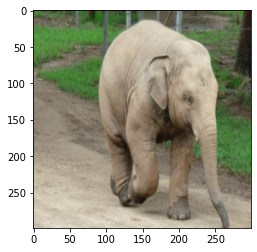

In [42]:
img_path='./160504082300__89466673_elephant2.jpg'
img=read_img(img_path)
plt.imshow(tf.cast(img,tf.uint8)[0])

In [46]:
img = preprocess_input(img)  # 影像前處理
preds = model.predict(img)  # 預測圖片
print("Predicted:", decode_predictions(preds, top=3)[0])  # 輸出預測最高的三個類別

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01930112', 'nematode', 0.13256462), ('n03729826', 'matchstick', 0.10283805), ('n03196217', 'digital_clock', 0.040645722)]
